In [19]:
### Example script to save ubar plots to file
import os
import sys
import glob
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import sys
sys.path.insert(0,'..')

from plot_functions.plot_map import plot_map
from clim_functions.mean_lat_weighted import mean_lat_weighted


In [2]:
# Select run to plot
run = '039'
basedir = os.environ['SCRATCH']+'/MiMA/runs/'
rundir = basedir + run + '/'
print(rundir)

print(glob.glob(rundir+'*.nc'))
filename = 'atmos_daily'
dataset = nc.Dataset(rundir+filename+'.nc', 'r')

lon = dataset['lon']
lat = dataset['lat']
time = dataset['time']
pfull = dataset['pfull']
ucomp = dataset['ucomp']
gwfu_cgwd = dataset['gwfu_cgwd']
gwfv_cgwd = dataset['gwfv_cgwd']

/scratch/users/lauraman/MiMA/runs/039/
['/scratch/users/lauraman/MiMA/runs/039/atmos_daily.nc', '/scratch/users/lauraman/MiMA/runs/039/atmos_avg.nc', '/scratch/users/lauraman/MiMA/runs/039/atmos_avg2.nc', '/scratch/users/lauraman/MiMA/runs/039/atmos_daily2.nc']


In [7]:
model_level = 23 
model_height = pfull[model_level]

In [4]:
gwd_u = gwfu_cgwd[:, model_level, :, :].mean(axis=0)
gwd_v = gwfv_cgwd[:, model_level, :, :].mean(axis=0)

<GeoAxesSubplot:title={'center':'gwd v (92 hPa)'}>

<Figure size 432x288 with 0 Axes>

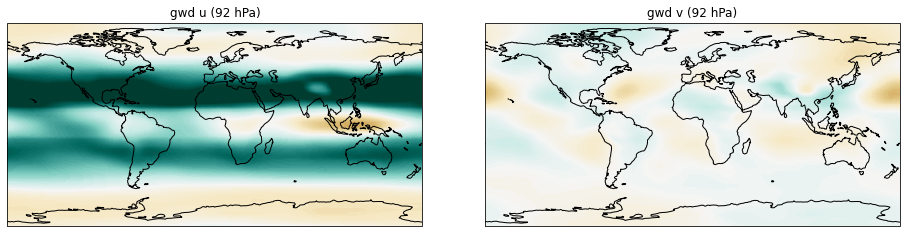

In [17]:
nrows = 1
ncols = 2
levels = np.linspace(-2e-6, 2e-6, 100)

plt.clf()
fig, axs = plt.subplots(nrows, ncols,figsize=(16, 8), gridspec_kw = {'wspace':0.15, 'hspace':0.1}, 
                        subplot_kw={'projection': ccrs.PlateCarree()}, sharey=True)

plt.sca(axs[0])
plot_map(lon[:], lat[:], gwd_u, ax=axs[0], levels=levels, title='gwd u ({:.2g} hPa)'.format(model_height))
plt.sca(axs[1])
plot_map(lon[:], lat[:], gwd_v,  ax=axs[1], levels=levels, title='gwd v ({:.2g} hPa)'.format(model_height))
#cbar = plt.colorbar(ax=axs[1], ticks=[-1e-4, -1e-6, 0, 1e-6, 1e-4], location='bottom', label='m/s^2',
#                   orientation='horizontal')

## QBO drag

<Figure size 432x288 with 0 Axes>

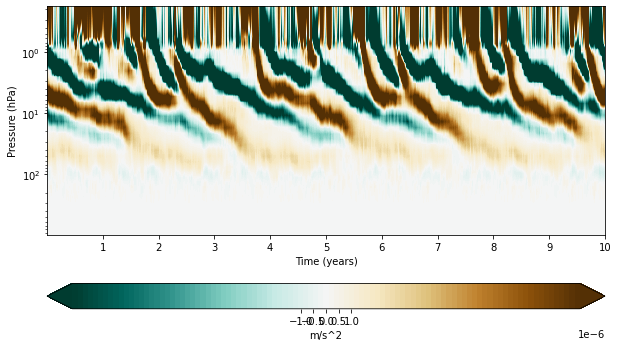

In [29]:
# Plot contours of zonal mean wind speeds in 4degS-4degN region (inds 30-34)
gwdu_zonal = mean_lat_weighted( gwfu_cgwd[:, :, 30:34, :].mean(axis=(-1)), lat[30:34], axis=(-1) )
t = time[:]

levels = np.linspace(-1e-5, 1e-5, 100)

nrows = 1
ncols = 1

plt.clf()
fig, axs = plt.subplots(nrows, ncols,figsize=(10, 6), gridspec_kw = {'wspace':0., 'hspace':0.}, sharey=True)

plt.contourf(time[:]-time[0], pfull[:], gwdu_zonal.T, 
             cmap = 'BrBG_r', levels = levels, extend='both')
plt.ylabel('Pressure (hPa)')
plt.xlabel('Time (years)')
plt.xticks(np.arange(360., len(time)+1, 360.), np.arange(1, int((len(time)+1)/360)+1 , 1))
axs.set_yscale('log')
axs.invert_yaxis()
cbar = plt.colorbar(ticks=np.arange(-1e-6, 1.01e-6, 5e-7), location='bottom', label='m/s^2',
                    orientation='horizontal')


## Polar Vortex drag


<Figure size 432x288 with 0 Axes>

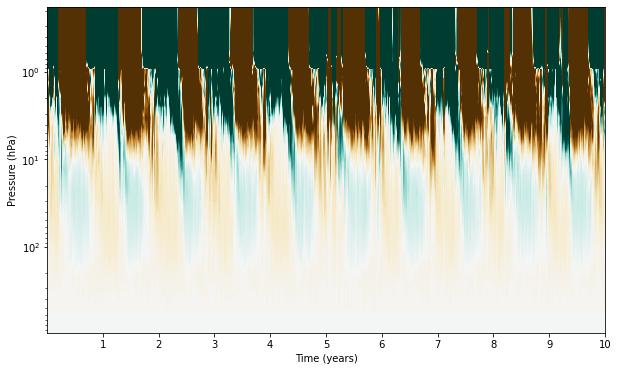

In [30]:
# Plot contours of zonal mean wind speeds in 60N region (inds 53:55)
gwdu_zonal = mean_lat_weighted( gwfu_cgwd[:, :, 53:55, :].mean(axis=(-1)), lat[53:55], axis=(-1) )
t = time[:]

nrows = 1
ncols = 1

plt.clf()
fig, axs = plt.subplots(nrows, ncols,figsize=(10, 6), gridspec_kw = {'wspace':0., 'hspace':0.}, sharey=True)

plt.contourf(time[:]-time[0], pfull[:], gwdu_zonal.T, 
             cmap = 'BrBG_r', levels = levels, extend='both')
plt.ylabel('Pressure (hPa)')
plt.xlabel('Time (years)')
plt.xticks(np.arange(360., len(time)+1, 360.), np.arange(1, int((len(time)+1)/360)+1 , 1))
axs.set_yscale('log')
axs.invert_yaxis()
#cbar = plt.colorbar(ticks=np.arange(-1e-6, 1.01e-6, 5e-7), location='bottom', label='m/s^2',
#                    orientation='horizontal')